In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
# import plotly.express as px

from IPython.display import display
## df = df.loc[maior,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District', 'Negotiation Type', 'Property Type', 'Latitude','Longitude']]

## Limpeza dos dados

In [136]:
df0 = pd.read_csv('sao-paulo-properties-april-2019.csv')
display(df0.head(3))
display(df0.shape)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


(13640, 16)

`conferimos se há valor nulo (nan) no dataframe`

In [137]:
display(df0.isnull().sum())

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [138]:
display(df0.dtypes)

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

`Analisamos quias series tinham valores binários que deveriamos substituir por 'sim' ou 'não', ou valores irrelevantes para a análise por terem valor constante. Assim por uma questão de visivelmente não ser o caso das series ['Price', 'Condo', 'Size', 'District', 'Latitude','Longitude'] já as excluímos dessa análise`

In [139]:
display(df0['Rooms'].unique())
display(df0['Toilets'].unique())
display(df0['Suites'].unique())
display(df0['Parking'].unique())
display(df0['Elevator'].unique())
display(df0['Furnished'].unique())
display(df0['Swimming Pool'].unique())
display(df0['New'].unique())
display(df0['Negotiation Type'].unique())
display(df0['Property Type'].unique())


array([ 2,  1,  3,  4,  5, 10,  6,  7], dtype=int64)

array([2, 3, 4, 1, 5, 6, 7, 8], dtype=int64)

array([1, 3, 2, 4, 0, 5, 6], dtype=int64)

array([1, 2, 3, 4, 5, 6, 8, 9, 0, 7], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array(['rent', 'sale'], dtype=object)

array(['apartment'], dtype=object)

`Concluímos que as séries ['Elevator, Furnished, Swimming Pool, New'] podem ser transformadas
em categorias. Além disso, consideramos que as séries ['Latitude, Longitude'] podem ser desconsideradas na análise de preços pois a série ['District'] já permite analisar a interferência da região no preço. Ademais, a série ['Property Type'] tem todos os valores iguais e por isso pode ser descartado.`

`Verificamos que 52,99 % dos nossos dados eram sobre apartamentos sendo alugados, 47,01 % sobre apartamentos sendo vendidos. Por isso decidimos trabalhar na previsão dos preços de alugueis.`

rent: 52.99 %
sale: 47.01 %


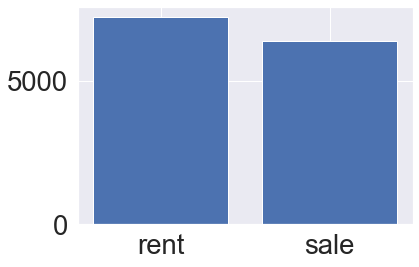

In [140]:
l_values = df0['Negotiation Type'].value_counts()

print(f'rent: {l_values[0]/df0.shape[0]*100:.2f} %')
print(f'sale: {l_values[1]/df0.shape[0]*100:.2f} %')
plt.bar(df0['Negotiation Type'].unique(), l_values)
plt.show()

# optamos por analizar somente os preços dos aps. alugados pois avisa uma base de dados
# um pouco maior

`Retiramos as séries consideradas descartáveis e filtramos apenas as linhas selencionando apenas as que tinham apartamentos sendo alugados.`

In [141]:
rent = df0['Negotiation Type'] == 'rent'
df = df0.loc[rent,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District']]

`Transformamos as séries binárias e a séries não numéricas em categorias e substituímos os valores 0 e 1 por não e sim respectivamente.`

In [142]:
df['District'] = df['District'].astype('category')

df['Swimming Pool'] = df['Swimming Pool'].astype('category')
df['New'] = df['New'].astype('category')
df['Furnished'] = df['Furnished'].astype('category')
df['Elevator'] = df['Elevator'].astype('category')


In [143]:
df['Swimming Pool'].cat.categories = ['No', 'Yes']
df['Furnished'].cat.categories = ['No', 'Yes']
df['Elevator'].cat.categories = ['No', 'Yes']
df['New'].cat.categories = ['No', 'Yes']

`confirmamos que todos os dados são da cidade de São Paulo`

In [144]:
df[['District','City']] = df['District'].str.split('/', expand = True)
display(df.City.unique())

array(['São Paulo'], dtype=object)

`Limpamos a série ['District'], retirando a informação de que os bairros são da cidade de São Paulo.`

In [145]:
df = df.drop(columns='City', axis=1)

In [146]:
display(df.head())
display(df.shape)
display(df.dtypes)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District
0,930,220,47,2,2,1,1,No,No,No,No,Artur Alvim
1,1000,148,45,2,2,1,1,No,No,No,No,Artur Alvim
2,1000,100,48,2,2,1,1,No,No,No,No,Artur Alvim
3,1000,200,48,2,2,1,1,No,No,No,No,Artur Alvim
4,1300,410,55,2,2,1,1,Yes,No,No,No,Artur Alvim


(7228, 12)

Price               int64
Condo               int64
Size                int64
Rooms               int64
Toilets             int64
Suites              int64
Parking             int64
Elevator         category
Furnished        category
Swimming Pool    category
New              category
District           object
dtype: object

## Análise dos dados

In [147]:
display(df.head())
display(df.shape)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District
0,930,220,47,2,2,1,1,No,No,No,No,Artur Alvim
1,1000,148,45,2,2,1,1,No,No,No,No,Artur Alvim
2,1000,100,48,2,2,1,1,No,No,No,No,Artur Alvim
3,1000,200,48,2,2,1,1,No,No,No,No,Artur Alvim
4,1300,410,55,2,2,1,1,Yes,No,No,No,Artur Alvim


(7228, 12)

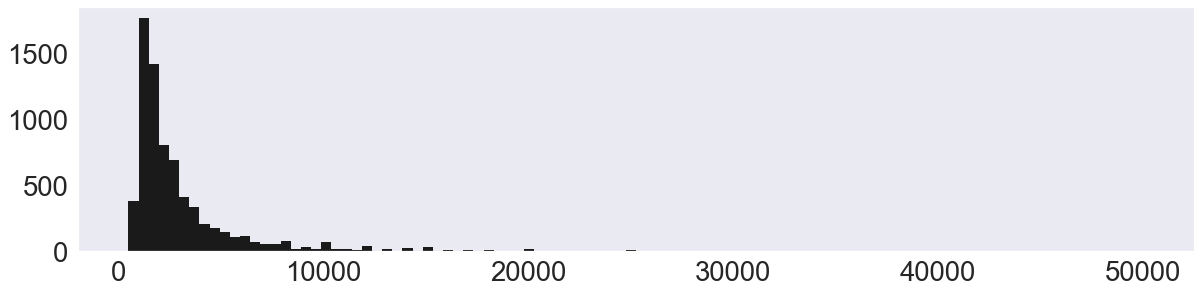

In [148]:
f = plt.figure(figsize=(20, 4.5))
plt.hist(df.Price, bins=100, color='k', linewidth=0.0, edgecolor='white')
plt.grid()
plt.show()

In [149]:
grouped = df.groupby('District')['Price'].mean().reset_index()
grouped = grouped.sort_values(by = 'Price',ascending = False)
display(grouped)

,District,Price
33,Itaim Bibi,8460.680556
31,Iguatemi,8301.688889
0,Alto de Pinheiros,7825.766917
51,Moema,7547.993865
40,Jardim Paulista,7409.914894
...,...,...
30,Guaianazes,970.833333
44,José Bonifácio,944.977273
45,Lajeado,931.250000
29,Grajaú,925.000000


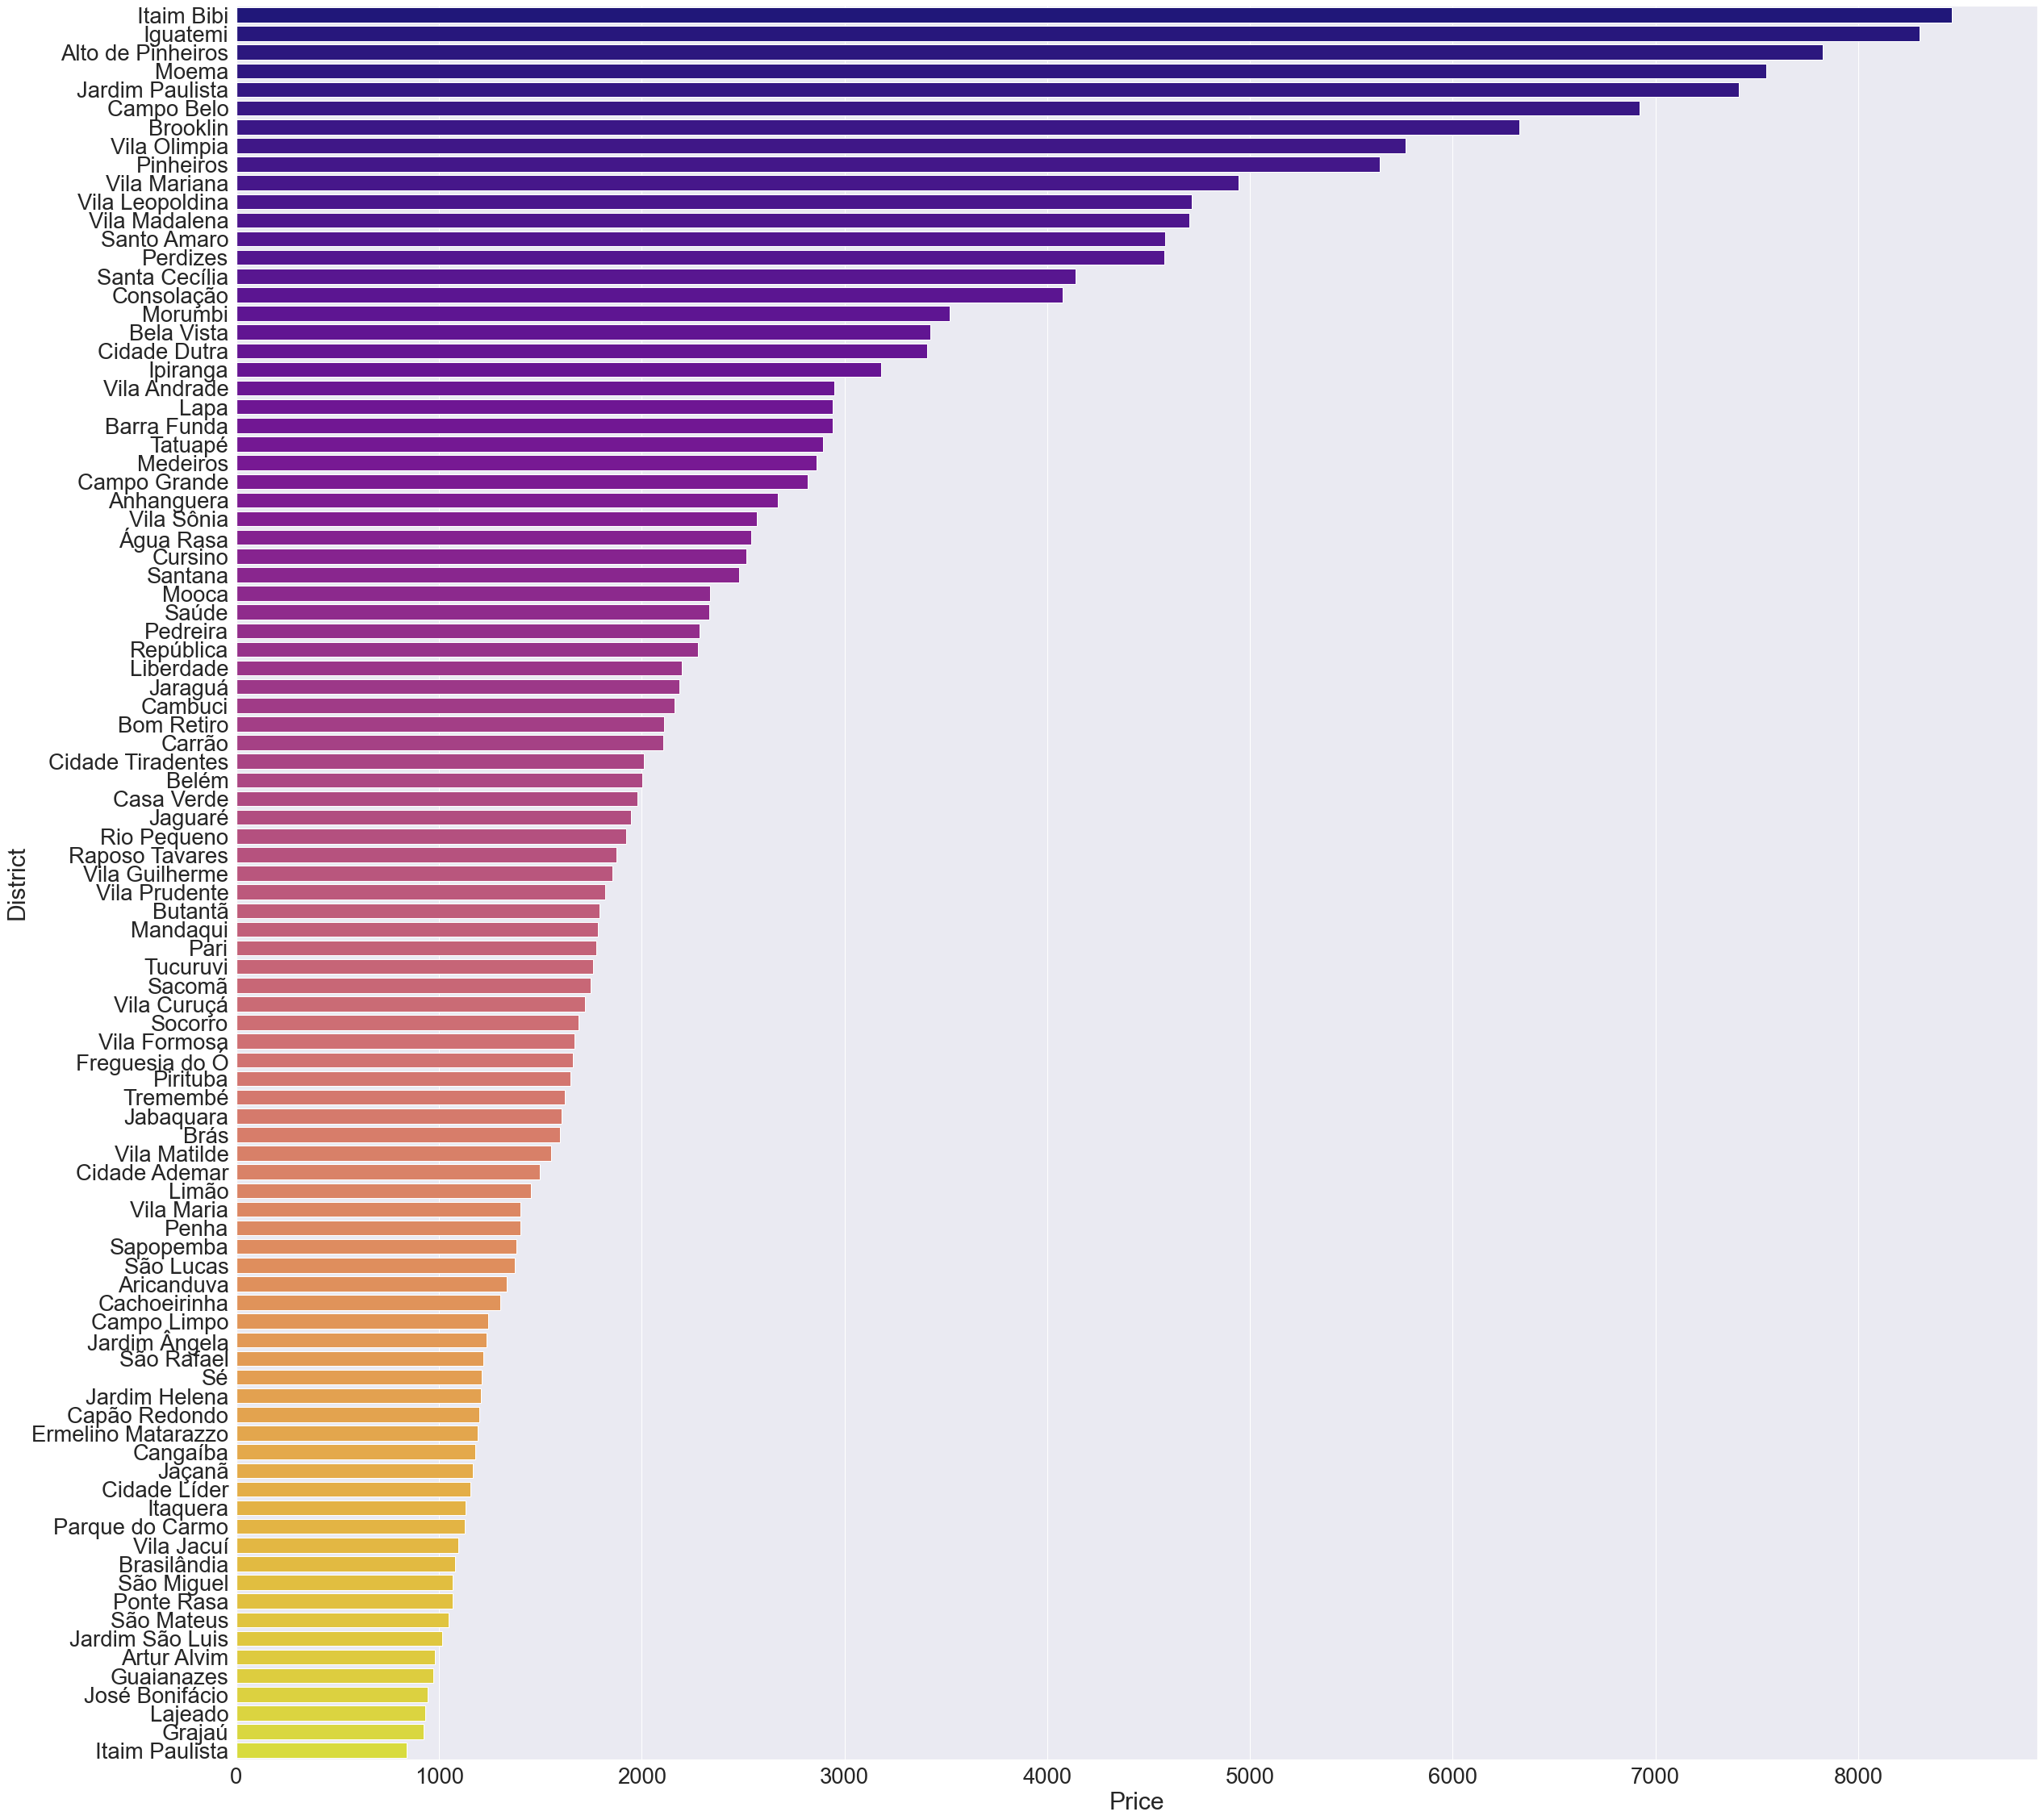

In [150]:
plt.figure(figsize = (40,40))
sns.set(font_scale = 2.5)
ax = sns.barplot(x='Price', y='District', data= grouped, palette = 'plasma')

In [151]:
# df2 = df.loc[:, ['Price', 'New']]

# px.histogram(df2, x='Price', color='New') # opacity=0.5,

In [152]:
# df2 = df.loc[:, ['Price', 'Swimming Pool']]

# px.histogram(df2, x='Price', color='Swimming Pool') # opacity=0.5,

In [153]:
# df2 = df.loc[:, ['Price', 'Furnished']]

# px.histogram(df2, x='Price', color='Furnished') # opacity=0.5,

In [154]:
# df2 = df.loc[:, ['Price', 'Elevator']]

# px.histogram(df2, x='Price', color='Elevator') # opacity=0.5,

<Figure size 720x5040 with 0 Axes>

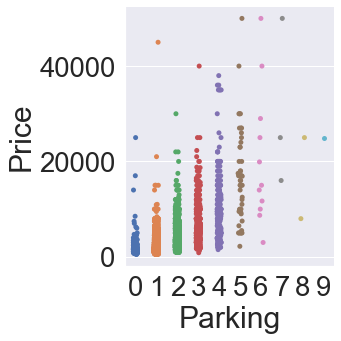

In [155]:
plt.figure(figsize=(10, 70))
ax = sns.catplot(x='Parking', y = 'Price', data=df)
plt.show()

In [156]:
# # ['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'District', 'Property Type']
# print(f'Correlação Price/Condo: {df.Price.corr(df.Condo)*100:.3f} %')
# print(f'Correlação Price/Size: {df.Price.corr(df.Size)*100:.3f} %')
# print(f'Correlação Price/Rooms: {df.Price.corr(df.Rooms)*100:.3f} %')
# print(f'Correlação Price/Toilets: {df.Price.corr(df.Toilets)*100:.3f} %')
# print(f'Correlação Price/Suites: {df.Price.corr(df.Suites)*100:.3f} %')
# print(f'Correlação Price/Parking: {df.Price.corr(df.Parking)*100:.3f} %')
# # print(f'Correlação Price\Elevator: {df.Price.corr(df.Elevator)*100:.3f} %')
# # print(f'Correlação Price\Furnished: {df.Price.corr(df.Furnished)*100:.3f} %')
# # # print(f'Correlação Price/Swimming Pool: {df['Price'].corr(df['Swimming Pool'])*100:.3f} %')
# # print(f'Correlação Price\District: {df.Price.corr(df.District)*100:.3f} %')
# # # print(f'Correlação Price/Property Type: {df.Price.corr(df.Property Type)*100:.3f} %')

## CRIANDO TESTES

In [157]:
features = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites',	'Parking',	'Elevator',	'Furnished', 'Swimming Pool', 'New', 'District']
X = df.loc[:, features]
y = df.loc[:, ['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

X_test


,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District
771,300,35,1,2,1,1,Yes,No,No,No,Cambuci
9416,533,107,3,2,1,2,No,No,Yes,No,Tremembé
4026,914,101,3,3,1,2,Yes,No,Yes,No,Saúde
3083,350,45,2,1,0,1,Yes,No,No,No,Itaquera
9865,0,54,2,2,1,1,Yes,No,Yes,No,Capão Redondo
...,...,...,...,...,...,...,...,...,...,...,...
195,0,44,2,2,1,1,No,No,No,No,Ermelino Matarazzo
2090,1300,125,3,4,3,3,Yes,No,Yes,No,Vila Leopoldina
2027,1150,85,2,2,1,1,No,No,Yes,No,Pirituba
5405,1300,178,3,4,3,3,No,No,Yes,No,Brooklin


In [158]:
X_train

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District
2457,1400,170,3,1,0,2,No,No,No,No,Liberdade
9442,564,78,3,2,1,1,No,No,Yes,No,Tucuruvi
9460,450,47,2,2,1,1,No,No,Yes,No,Vila Guilherme
2310,208,34,1,2,1,0,No,No,No,No,Brás
32,811,107,3,3,1,2,Yes,No,Yes,No,Belém
...,...,...,...,...,...,...,...,...,...,...,...
5175,691,40,1,2,1,1,No,No,Yes,No,Vila Madalena
3264,900,90,3,2,1,2,No,No,Yes,No,Vila Prudente
1653,300,48,2,2,1,1,No,No,No,No,Brasilândia
2607,450,70,2,2,1,1,No,Yes,Yes,No,Casa Verde


### Referêcias

- Análise de dados e previsão de preços: https://www.kaggle.com/code/juxwzera/predictions-for-price